In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [3]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scanmsupport.scanm.scanm_smp import SMP

In [4]:
scmf = SMP()

In [7]:
fname = "scanmsupport\data\M1_LR_GCL4_chirp"
#fname = "scanmsupport\data\Q0_DN.smp"
_ = scmf.loadSMH(fname, verbose=False)

Processing file `scanmsupport\data\M1_LR_GCL4_chirp.smh`
Loading pre-header ...
Loading parameters (key-value pairs) ...
71 key-value pair(s) found
Correct parameters for older files ...
68 parameter(s) extracted
Done.


In [8]:
_ = scmf.loadSMP()

Processing file `scanmsupport\data\M1_LR_GCL4_chirp.smp`
Loading post-header ...
3 AI channel(s) (0b111)
2224 of 1500 buffer(s) (each 2560 pixels) per channel
2224 pixel bufs of 2224 read.
Done.


In [9]:
scmf.summary()

Summary
-------
Scan    : mode, type   : XYImage (0), 10
Pixel   : size         : 2 bytes/pixel
          duration     : 25.0 us (25.0)
Frame   : x-y size     : 80 x 64 pixels
          x-offset     : 6 pixels
          x-retrace    : 10 pixels
          count        : 1112 recorded
          organisation : 2 pixel buffers/frame
Stimulus: # of buffers : 3
          mask         : 0111
Input   : # of channels: 3
          mask         : 0111
Zoom factor            : 0.87


In [10]:
scmf._kvPairDict

{'ComputerName': [numpy.character, 1, 'euler14_01'],
 'UserName': [numpy.character, 1, 'eulerlab'],
 'OriginalPixelDataFileName': [numpy.character,
  1,
  'C:\\Users\\eulerlab\\Documents\\WaveMetrics\\Igor Pro 6 User Files\\ScanM_Data\\M1_LR_GCL4_chirp.smp'],
 'DateStamp': [numpy.character, 1, '2021-12-17'],
 'TimeStamp': [numpy.character, 1, '15-38-2-475'],
 'ScanMproductVersionAndTargetOS': [numpy.character, 1, '0.0.36.61_4'],
 'CallingProcessPath': [numpy.character,
  1,
  'C:\\Program Files (x86)\\WaveMetrics\\Igor Pro Folder\\Igor.exe'],
 'CallingProcessVersion': [numpy.character, 1, '6.3.7.2'],
 'PixelSizeInBytes': [numpy.uint32, 1, 2],
 'StimulusChannelMask': [numpy.uint32, 1, 7],
 'MinVoltsAO': [numpy.float64, 1, -4.0],
 'MaxVoltsAO': [numpy.float64, 1, 4.0],
 'MaxStimulusBufferMapLength': [numpy.uint32, 1, 1],
 'NumberOfStimulusBuffers': [numpy.uint32, 1, 3],
 'InputChannelMask': [numpy.uint32, 1, 7],
 'TargetedPixelDuration_µs': [numpy.float64, 1, 25.0],
 'RealPixelDuration_µ

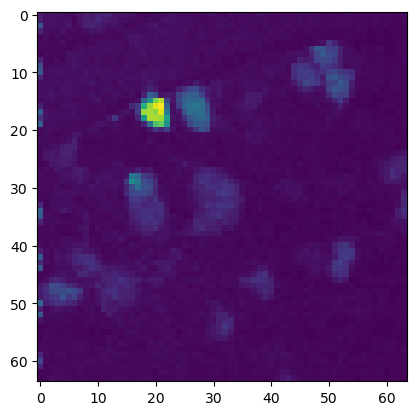

In [11]:
fr = scmf.getData(ch=0, crop=True)[1000]

plt.imshow(fr, interpolation='nearest')
plt.show()

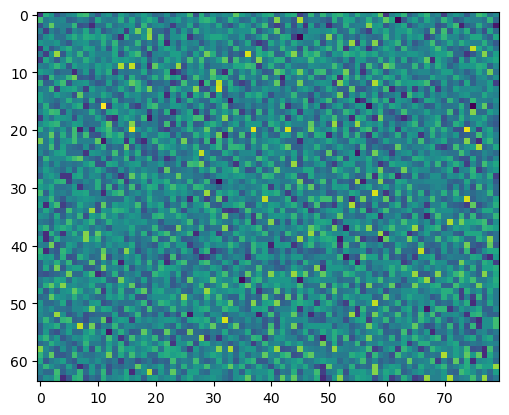

In [13]:
fr = scmf.getData(ch=2, crop=False)[0]

plt.imshow(fr, interpolation='nearest')
plt.show()

In [12]:
video = scmf.getData(ch=0, crop=True)

fig = plt.figure()
im = plt.imshow(video[0,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available